In [127]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score, classification_report
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
# fetch dataset 
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938)

In [108]:
# data (as pandas dataframes) 
X = regensburg_pediatric_appendicitis.data.features 
y = regensburg_pediatric_appendicitis.data.targets 

In [109]:
# variable information 
print(regensburg_pediatric_appendicitis.variables) 

                                name     role         type demographic  \
0                                Age  Feature   Continuous         Age   
1                                BMI  Feature   Continuous        None   
2                                Sex  Feature  Categorical         Sex   
3                             Height  Feature   Continuous        None   
4                             Weight  Feature      Integer        None   
5                     Length_of_Stay  Feature      Integer        None   
6                         Management   Target  Categorical        None   
7                           Severity   Target  Categorical        None   
8              Diagnosis_Presumptive    Other       Binary        None   
9                          Diagnosis   Target       Binary        None   
10                    Alvarado_Score  Feature      Integer        None   
11     Paedriatic_Appendicitis_Score  Feature      Integer        None   
12                    Appendix_on_US  

In [110]:
# Data
df = pd.concat([X, y], axis=1)
df.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,...,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings,Management,Severity,Diagnosis
0,12.68,16.9,female,148.0,37.0,3.0,4.0,3.0,yes,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conservative,uncomplicated,appendicitis
1,14.10,31.9,male,147.0,69.5,2.0,5.0,4.0,no,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,conservative,uncomplicated,no appendicitis
2,14.14,23.3,female,163.0,62.0,4.0,5.0,3.0,no,NaN,...,NaN,NaN,NaN,NaN,yes,yes,NaN,conservative,uncomplicated,no appendicitis
3,16.37,20.6,female,165.0,56.0,3.0,7.0,6.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,yes,NaN,conservative,uncomplicated,no appendicitis
4,11.08,16.9,female,163.0,45.0,3.0,5.0,6.0,yes,7.0,...,NaN,NaN,NaN,NaN,NaN,yes,NaN,conservative,uncomplicated,appendicitis


### EDA

In [111]:
df.shape

(782, 56)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Alvarado_Score                    730 non-null    float64
 7   Paedriatic_Appendicitis_Score     730 non-null    float64
 8   Appendix_on_US                    777 non-null    object 
 9   Appendix_Diameter                 498 non-null    float64
 10  Migratory_Pain                    773 non-null    object 
 11  Lower_Right_Abd_Pain              774 non-null    object 
 12  Contrala

In [113]:
df.isna().sum()

Age                                   1
BMI                                  27
Sex                                   2
Height                               26
Weight                                3
Length_of_Stay                        4
Alvarado_Score                       52
Paedriatic_Appendicitis_Score        52
Appendix_on_US                        5
Appendix_Diameter                   284
Migratory_Pain                        9
Lower_Right_Abd_Pain                  8
Contralateral_Rebound_Tenderness     15
Coughing_Pain                        16
Nausea                                8
Loss_of_Appetite                     10
Body_Temperature                      7
WBC_Count                             6
Neutrophil_Percentage               103
Segmented_Neutrophils               728
Neutrophilia                         50
RBC_Count                            18
Hemoglobin                           18
RDW                                  26
Thrombocyte_Count                    18


Удаляем признаки где процент пропусков больше 65 %

In [114]:
df_cols = df.columns
drop_cols = []
for col in df_cols:
    if ((df[col].isna().sum()/len(df) )*100) > 65:
      drop_cols.append(col)
drop_cols

['Segmented_Neutrophils',
 'Appendix_Wall_Layers',
 'Target_Sign',
 'Appendicolith',
 'Perfusion',
 'Perforation',
 'Surrounding_Tissue_Reaction',
 'Appendicular_Abscess',
 'Abscess_Location',
 'Pathological_Lymph_Nodes',
 'Lymph_Nodes_Location',
 'Bowel_Wall_Thickening',
 'Conglomerate_of_Bowel_Loops',
 'Ileus',
 'Coprostasis',
 'Meteorism',
 'Enteritis',
 'Gynecological_Findings']

In [115]:
len(drop_cols)

18

In [116]:
df = df.drop(drop_cols, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Alvarado_Score                    730 non-null    float64
 7   Paedriatic_Appendicitis_Score     730 non-null    float64
 8   Appendix_on_US                    777 non-null    object 
 9   Appendix_Diameter                 498 non-null    float64
 10  Migratory_Pain                    773 non-null    object 
 11  Lower_Right_Abd_Pain              774 non-null    object 
 12  Contrala

In [117]:
df.Diagnosis.value_counts()

Diagnosis
appendicitis       463
no appendicitis    317
Name: count, dtype: int64

In [118]:
df.isna().sum()

Age                                   1
BMI                                  27
Sex                                   2
Height                               26
Weight                                3
Length_of_Stay                        4
Alvarado_Score                       52
Paedriatic_Appendicitis_Score        52
Appendix_on_US                        5
Appendix_Diameter                   284
Migratory_Pain                        9
Lower_Right_Abd_Pain                  8
Contralateral_Rebound_Tenderness     15
Coughing_Pain                        16
Nausea                                8
Loss_of_Appetite                     10
Body_Temperature                      7
WBC_Count                             6
Neutrophil_Percentage               103
Neutrophilia                         50
RBC_Count                            18
Hemoglobin                           18
RDW                                  26
Thrombocyte_Count                    18
Ketones_in_Urine                    200


In [119]:
df = df.dropna(subset=['Diagnosis'])

In [120]:
df.shape

(780, 38)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 781
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               780 non-null    float64
 1   BMI                               754 non-null    float64
 2   Sex                               779 non-null    object 
 3   Height                            755 non-null    float64
 4   Weight                            778 non-null    float64
 5   Length_of_Stay                    777 non-null    float64
 6   Alvarado_Score                    730 non-null    float64
 7   Paedriatic_Appendicitis_Score     730 non-null    float64
 8   Appendix_on_US                    777 non-null    object 
 9   Appendix_Diameter                 498 non-null    float64
 10  Migratory_Pain                    773 non-null    object 
 11  Lower_Right_Abd_Pain              774 non-null    object 
 12  Contralateral

<table><thead><tr style="background-color: #777; color: black;"><th>Название признака</th><th>Замена</th><th>Обоснование</th></tr></thead><tbody><tr><td>Age</td><td>Среднее значение</td><td>Непрерывное распределение</td></tr><tr><td>BMI</td><td>Среднее значение</td><td>Непрерывное распределение</td></tr><tr><td>Sex</td><td>Мода</td><td>Категориальная переменная</td></tr><tr><td>Height</td><td>Среднее значение</td><td>Непрерывное распределение</td></tr><tr><td>Weight</td><td>Среднее значение</td><td>Непрерывное распределение</td></tr><tr><td>Length_of_Stay</td><td>Среднее значение</td><td>Непрерывное распределение</td></tr><tr><td>Alvarado_Score</td><td>Среднее значение</td><td>Непрерывное распределение</td></tr><tr><td>Paedriatic_Appendicitis_Score</td><td>Среднее значение</td><td>Непрерывное распределение</td></tr><tr><td>Appendix_on_US</td><td>Мода</td><td>Категориальная переменная (присутствие/отсутствие)</td></tr><tr><td>Appendix_Diameter</td><td>Среднее значение</td><td>Непрерывное распределение</td></tr><tr><td>Migratory_Pain</td><td>Мода</td><td>Категориальная переменная</td></tr><tr><td>Lower_Right_Abd_Pain</td><td>Мода</td><td>Категориальная переменная</td></tr><tr><td>Contralateral_Rebound_Tenderness</td><td>Мода</td><td>Категориальная переменная</td></tr><tr><td>Coughing_Pain</td><td>Мода</td><td>Категориальная переменная</td></tr><tr><td>Nausea</td><td>Мода</td><td>Категориальная переменная</td></tr><tr><td>Loss_of_Appetite</td><td>Мода</td><td>Категориальная переменная</td></tr><tr><td>Body_Temperature</td><td>Среднее значение</td><td>Непрерывное распределение</td></tr><tr><td>WBC_Count</td><td>Среднее значение</td><td>Непрерывное распределение</td></tr><tr><td>Neutrophil_Percentage</td><td>Среднее значение</td><td>Непрерывное распределение</td></tr><tr><td>Neutrophilia</td><td>Мода</td><td>Категориальная переменная</td></tr><tr><td>RBC_Count</td><td>Среднее значение</td><td>Непрерывное распределение</td></tr><tr><td>Hemoglobin</td><td>Среднее значение</td><td>Непрерывное распределение</td></tr><tr><td>RDW</td><td>Среднее значение</td><td>Непрерывное распределение</td></tr><tr><td>Thrombocyte_Count</td><td>Среднее значение</td><td>Непрерывное распределение</td></tr><tr><td>Ketones_in_Urine</td><td>Мода</td><td>Категориальная переменная</td></tr><tr><td>RBC_in_Urine</td><td>Мода</td><td>Категориальная переменная</td></tr><tr><td>WBC_in_Urine</td><td>Мода</td><td>Категориальная переменная</td></tr><tr><td>CRP</td><td>Среднее значение</td><td>Непрерывное распределение</td></tr><tr><td>Dysuria</td><td>Мода</td><td>Категориальная переменная</td></tr><tr><td>Stool</td><td>Мода</td><td>Категориальная переменная</td></tr><tr><td>Peritonitis</td><td>Мода</td><td>Категориальная переменная</td></tr><tr><td>Psoas_Sign</td><td>Мода</td><td>Категориальная переменная</td></tr><tr><td>Ipsilateral_Rebound_Tenderness</td><td>Мода</td><td>Категориальная переменная</td></tr><tr><td>US_Performed</td><td>Мода</td><td>Категориальная переменная</td></tr><tr><td>Free_Fluids</td><td>Мода</td><td>Категориальная переменная</td></tr><tr><td>Management</td><td>Мода</td><td>Категориальная переменная</td></tr><tr><td>Severity</td><td>Мода</td><td>Категориальная переменная</td></tr></tbody></table>

In [122]:
# Замена пропущенных значений
def replace_na(df):
    for column in df.columns:
        if df[column].dtype == 'object' or df[column].nunique() <= 2:
            # Замена модой для категориальных и бинарных переменных
            mode_value = df[column].mode()[0]
            df[column] = df[column].fillna(mode_value)
        else:
            # Замена средним значением для непрерывных переменных
            mean_value = df[column].mean()
            df[column] = df[column].fillna(mean_value)
    return df

df = replace_na(df)

In [123]:
df.isna().sum().sum()

0

In [124]:
categorical_features = df.select_dtypes(include=['object']).columns
label_encoders = {column: LabelEncoder() for column in categorical_features}
for column in categorical_features:
    df[column] = label_encoders[column].fit_transform(df[column])

### Data split

In [125]:
target_data = df['Diagnosis']
features_data = df.drop('Diagnosis', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features_data, target_data, test_size=0.2, random_state=42)

### Scaler

In [126]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Models

Logistic Regression Train Accuracy: 0.9567307692307693
Logistic Regression Test Accuracy: 0.8974358974358975
Logistic Regression Train Log Loss: 0.1314838289682003
Logistic Regression Test Log Loss: 0.22813598777195473


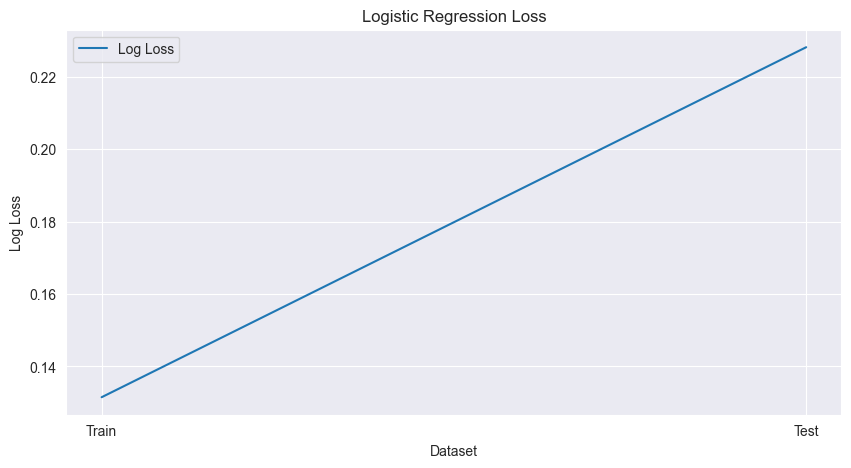

In [128]:
# Логистическая регрессия
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Предсказания
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Вероятности
y_train_proba = log_reg.predict_proba(X_train)
y_test_proba = log_reg.predict_proba(X_test)

# Метрики
log_reg_train_loss = log_loss(y_train, y_train_proba)
log_reg_test_loss = log_loss(y_test, y_test_proba)

print("Logistic Regression Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Logistic Regression Train Log Loss:", log_reg_train_loss)
print("Logistic Regression Test Log Loss:", log_reg_test_loss)

# График функции потерь
plt.figure(figsize=(10, 5))
plt.plot([1, 2], [log_reg_train_loss, log_reg_test_loss], label='Log Loss')
plt.xticks([1, 2], ['Train', 'Test'])
plt.xlabel('Dataset')
plt.ylabel('Log Loss')
plt.title('Logistic Regression Loss')
plt.legend()
plt.show()

Точность модели: Логистическая регрессия достигла высокой точности на обучающей выборке (около 95.7%) и хорошей точности на тестовой выборке (около 89.7%). Это свидетельствует о том, что модель хорошо обучена и способна эффективно классифицировать данные.

Функция потерь (Log Loss): Значение Log Loss на обучающей выборке составляет приблизительно 0.131, а на тестовой выборке — около 0.228. Низкие значения Log Loss также указывают на высокую уверенность модели в своих предсказаниях и хорошее качество вероятностных прогнозов.

Обобщающая способность: Модель демонстрирует хорошую обобщающую способность, поскольку точность на тестовой выборке близка к точности на обучающей выборке. Это подтверждает, что модель не переобучена и способна адекватно обрабатывать новые данные.

График функции потерь: График показывает, что значение Log Loss на тестовой выборке выше, чем на обучающей, что свидетельствует о небольшом переобучении модели. Однако, оба значения Log Loss остаются на приемлемом уровне.

### Random forest

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.9487179487179487
Random Forest Train Log Loss: 0.06080753037688064
Random Forest Test Log Loss: 0.19171128355539224


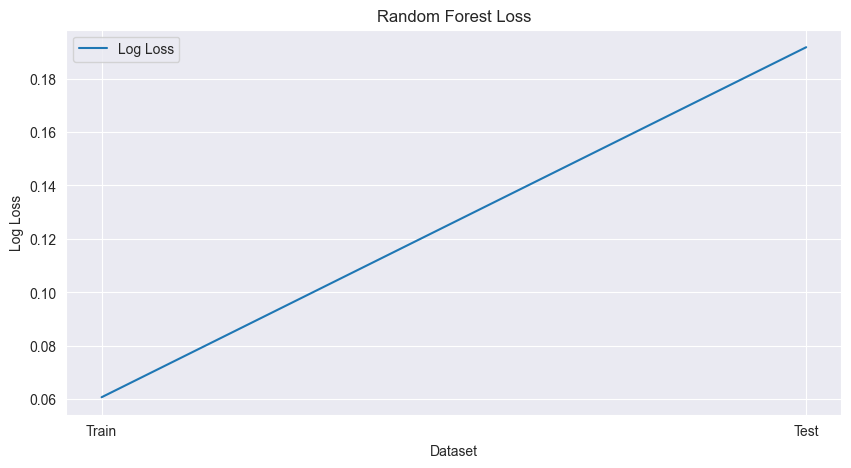

In [129]:
from sklearn.ensemble import RandomForestClassifier

# Случайный лес
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Предсказания
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

# Вероятности
y_train_proba = rf_clf.predict_proba(X_train)
y_test_proba = rf_clf.predict_proba(X_test)

# Метрики
rf_train_loss = log_loss(y_train, y_train_proba)
rf_test_loss = log_loss(y_test, y_test_proba)

print("Random Forest Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Random Forest Train Log Loss:", rf_train_loss)
print("Random Forest Test Log Loss:", rf_test_loss)

# График функции потерь
plt.figure(figsize=(10, 5))
plt.plot([1, 2], [rf_train_loss, rf_test_loss], label='Log Loss')
plt.xticks([1, 2], ['Train', 'Test'])
plt.xlabel('Dataset')
plt.ylabel('Log Loss')
plt.title('Random Forest Loss')
plt.legend()
plt.show()

Точность модели: Модель достигла высокой точности на обучающей выборке (100%) и хорошей точности на тестовой выборке (почти 95%). Это свидетельствует о том, что модель хорошо обучена и способна эффективно классифицировать данные.

Функция потерь (Log Loss): Значение Log Loss на обучающей выборке составляет приблизительно 0.061, а на тестовой выборке — около 0.192. Низкие значения Log Loss указывают на высокую уверенность модели в своих предсказаниях и хорошее качество вероятностных прогнозов.

Обобщающая способность: Модель демонстрирует хорошую обобщающую способность, так как точность на тестовой выборке близка к точности на обучающей выборке. Это означает, что модель не переобучена и успешно обобщает знания на новые данные.

График функции потерь: График показывает, что значение Log Loss на тестовой выборке немного выше, чем на обучающей, что свидетельствует о небольшом, но приемлемом уровне переобучения. В целом, оба значения Log Loss находятся на низком уровне, что является положительным показателем.

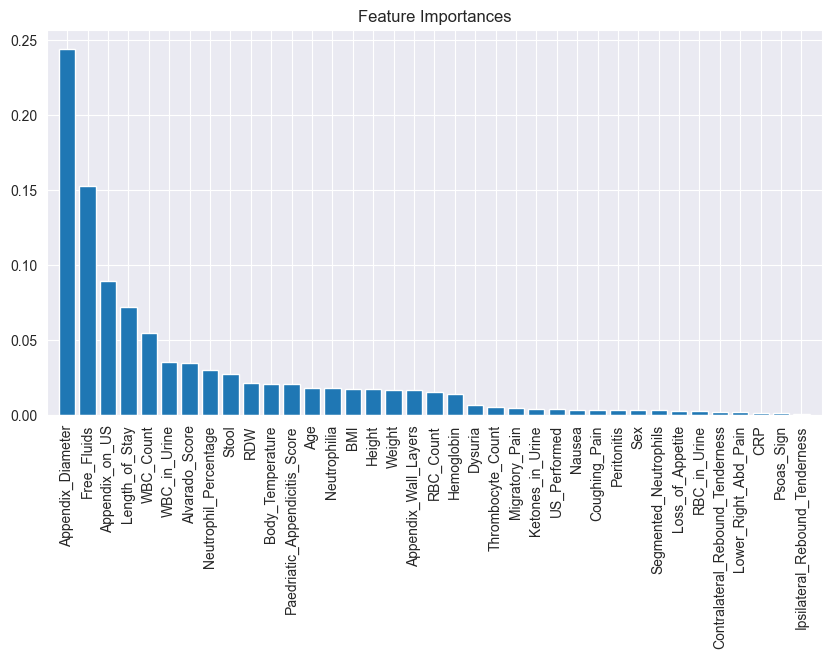

In [136]:
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Этот код демонстрирует важность признаков, оцененную моделью случайного леса (rf_clf). 

### Keras

Epoch 1/20


C:\Users\grayni\Desktop\tr_py\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - binary_accuracy: 0.6481 - loss: 0.6422 - val_binary_accuracy: 0.8013 - val_loss: 0.5170
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7952 - loss: 0.4943 - val_binary_accuracy: 0.8205 - val_loss: 0.4139
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8431 - loss: 0.3922 - val_binary_accuracy: 0.8462 - val_loss: 0.3545
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8964 - loss: 0.3215 - val_binary_accuracy: 0.8782 - val_loss: 0.3143
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9121 - loss: 0.2793 - val_binary_accuracy: 0.8654 - val_loss: 0.2883
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9294 - loss: 0.2396 - val_binary_accuracy: 0.8590 - val_loss: 0.2726
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9408 - loss: 0.1877 - val_binary_accuracy: 0.8782 - val_loss: 0.2592
Epoch 8/20
20/20 ━━━━━━━━━━━━━━

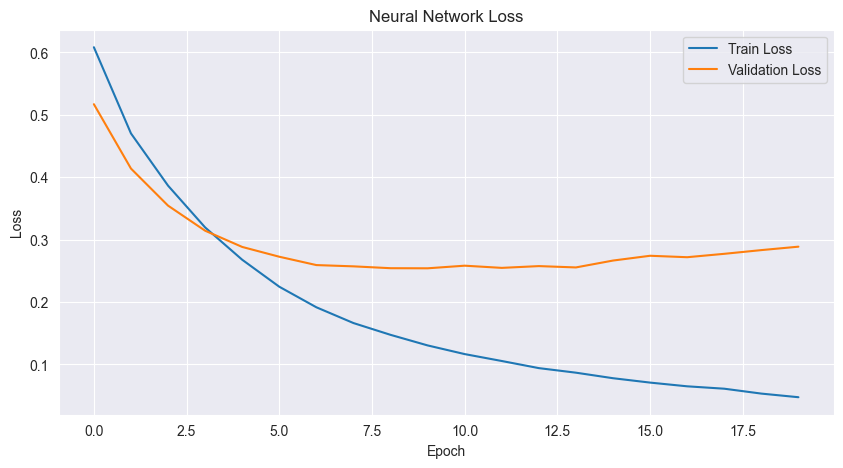

In [134]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Создание модели
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss=BinaryCrossentropy(), 
              metrics=[BinaryAccuracy()])

# Обучение модели
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# График функции потерь
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Neural Network Loss')
plt.legend()
plt.show()

Точность модели: На последних эпохах обучения нейронная сеть достигла высокой точности на обучающей выборке, близкой к 99%. Это указывает на то, что модель хорошо запомнила тренировочные данные и смогла адаптироваться к ним.

Функция потерь: Значение функции потерь на обучении также снизилось, что свидетельствует о том, что модель эффективно сходится к оптимальным весам.

Валидация: На валидационной выборке также наблюдается улучшение производительности модели с увеличением количества эпох. Точность на валидации достигла около 89%, а функция потерь уменьшилась до значения около 0.29 к концу обучения.

Обобщающая способность: Модель демонстрирует хорошую обобщающую способность, так как точность на валидации соответствует или близка к точности на обучающей выборке. Это свидетельствует о том, что модель не переобучена и успешно обобщает знания на новые данные.

